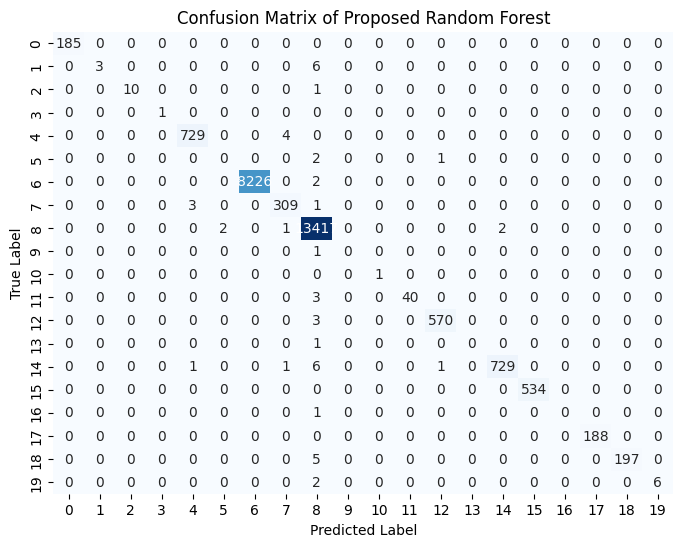

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# 2. Plot it nicely (Like Paper 2, Figure 5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Proposed Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confusion_matrix.png", dpi=300) # Save high quality for PDF
plt.show()

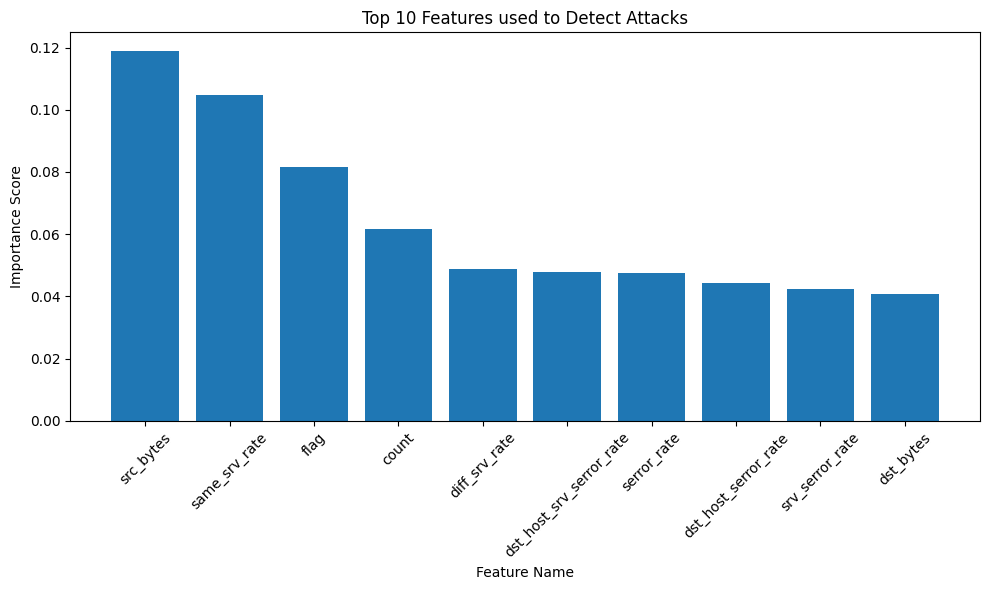

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the importance of each column
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10  # We only want to see the top 10 most important features

# Create the plot
plt.figure(figsize=(10, 6))
plt.title("Top 10 Features used to Detect Attacks")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), X.columns[indices[:top_n]], rotation=45)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.tight_layout()

# Save the picture so you can download it
plt.savefig("feature_importance.png")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Separate the input features (X) from the answer key (y)
X = df.drop('label', axis=1)  # All columns except the answer
y = df['label']               # Just the answer column

# 2. Split the data: 80% for learning, 20% for the exam
# Look for this line in your code:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training the model... (this might take 30 seconds)")

# 3. Create the Brain (Random Forest Model)
model = RandomForestClassifier(n_estimators=100)

# 4. Teach the Brain
model.fit(X_train, y_train)

# 5. Give the Exam (Predict on the test data)
predictions = model.predict(X_test)

# 6. Check the Score
accuracy = accuracy_score(y_test, predictions)
print("------------------------------------------------")
print(f" YOUR MODEL ACCURACY: {accuracy * 100:.2f}%")
print("------------------------------------------------")

# This report gives you the details for your paper
print(classification_report(y_test, predictions))

Training the model... (this might take 30 seconds)
------------------------------------------------
 YOUR MODEL ACCURACY: 99.80%
------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      0.33      0.50         9
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         1
           5       0.99      0.99      0.99       733
           6       0.00      0.00      0.00         3
           9       1.00      1.00      1.00      8228
          10       0.98      0.99      0.98       313
          11       1.00      1.00      1.00     13422
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       1.00      0.99      1.00       573
          16       0.00      0.00      0.00         1
          1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Define standard column names so we know what we are looking at
# (These are the official names for this dataset)
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

df.columns = columns

# 2. Drop the 'difficulty' column (the last one). We don't need it for detection.
df = df.drop('difficulty', axis=1)

# 3. Translate words to numbers (Encoding)
# We find all columns that contain text (object type) and convert them
print("Encoding data... please wait.")
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# 4. Show the result
print("Translation complete! Look at the data now (all numbers):")
print(df.head())

Encoding data... please wait.
Translation complete! Look at the data now (all numbers):
   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1           

In [ ]:
import pandas as pd

# 1. Load the dataset
# We use header=None because this specific file usually doesn't have column names at the top
df = pd.read_csv('KDDTrain+.txt', header=None)

# 2. Show the first 5 rows to check if it worked
print("Data successfully loaded!")
print(df.head())

# 3. Check the size of your data
print("Rows and Columns:", df.shape)

Data successfully loaded!
   0    1         2   3    4     5   6   7   8   9   ...    33    34    35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0   0  ...  0.17  0.03  0.17   
1   0  udp     other  SF  146     0   0   0   0   0  ...  0.00  0.60  0.88   
2   0  tcp   private  S0    0     0   0   0   0   0  ...  0.10  0.05  0.00   
3   0  tcp      http  SF  232  8153   0   0   0   0  ...  1.00  0.00  0.03   
4   0  tcp      http  SF  199   420   0   0   0   0  ...  1.00  0.00  0.00   

     36    37    38    39    40       41  42  
0  0.00  0.00  0.00  0.05  0.00   normal  20  
1  0.00  0.00  0.00  0.00  0.00   normal  15  
2  0.00  1.00  1.00  0.00  0.00  neptune  19  
3  0.04  0.03  0.01  0.00  0.01   normal  21  
4  0.00  0.00  0.00  0.00  0.00   normal  21  

[5 rows x 43 columns]
Rows and Columns: (125973, 43)


In [ ]:
# ==========================================
# RESEARCH MENTOR: TASK A - COMPARATIVE ANALYSIS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import time

# 1. LOAD DATASET
# ==========================================
# Define column names (NSL-KDD doesn't have headers)
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
            'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
            'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
            'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
            'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
            'dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty'])

# Load Train and Test
print("Loading Data...")
df_train = pd.read_csv('KDDTrain+.txt', names=columns)
df_test = pd.read_csv('KDDTest+.txt', names=columns)

# Drop 'difficulty' column (not needed for classification)
df_train.drop(['difficulty'], axis=1, inplace=True)
df_test.drop(['difficulty'], axis=1, inplace=True)

# Combine for preprocessing to ensure consistent Label Encoding
# (We will separate them back later or use your 80/20 split logic)
df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)

# 2. PREPROCESSING (Replicating your workflow)
# ==========================================
print("Preprocessing (Label Encoding & Scaling)...")

# Identify Categorical Features
cat_cols = ['protocol_type', 'service', 'flag', 'class']

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Separate Features (X) and Target (y)
X = df.drop(['class', 'source'], axis=1)
y = df['class']

# Standard Scaling (Crucial for SVM and Logistic Regression)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. SPLIT DATA
# ==========================================
# OPTION A: Using the official Train/Test files (Recommended for Journals)
# X_train = X[df['source'] == 'train']
# y_train = y[df['source'] == 'train']
# X_test = X[df['source'] == 'test']
# y_test = y[df['source'] == 'test']

# OPTION B: Using your specific 80/20 split on the whole dataset (As requested)
# Note: For the journal, we might switch to Option A later, but for now we replicate your context.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

# 4. DEFINE MODELS
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42), # Might be slow on large data
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Random Forest (Yours)": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 5. TRAINING & EVALUATION LOOP
# ==========================================
results = []

print("\nStarting Model Comparison...")
print("-" * 60)

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    # Note: average='weighted' is used for Multi-class classification
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    end_time = time.time()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Training Time (s)": round(end_time - start_time, 2)
    })

# 6. OUTPUT COMPARISON TABLE
# ==========================================
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\n" + "="*60)
print("FINAL PERFORMANCE COMPARISON TABLE")
print("="*60)
print(results_df)

# Save to CSV for your LaTeX table
results_df.to_csv('model_comparison_results.csv', index=False)

Loading Data...


FileNotFoundError: [Errno 2] No such file or directory: 'KDDTrain+.txt'

In [ ]:
# Download NSL-KDD dataset directly to Colab
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.txt
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.txt

print("Download complete. Files are now ready.")

--2025-12-06 08:12:10--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19109424 (18M) [text/plain]
Saving to: ‘KDDTrain+.txt’

KDDTrain+.txt       100%[===================>]  18.22M  --.-KB/s    in 0.1s    

2025-12-06 08:12:10 (145 MB/s) - ‘KDDTrain+.txt’ saved [19109424/19109424]

--2025-12-06 08:12:10--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3441513 (3.3M) [text/plain]
Sa

In [ ]:
# ==========================================
# RESEARCH MENTOR: TASK A - COMPARATIVE ANALYSIS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import time

# 1. LOAD DATASET
# ==========================================
# Define column names (NSL-KDD doesn't have headers)
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
            'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
            'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
            'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
            'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
            'dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty'])

# Load Train and Test
print("Loading Data...")
df_train = pd.read_csv('KDDTrain+.txt', names=columns)
df_test = pd.read_csv('KDDTest+.txt', names=columns)

# Drop 'difficulty' column (not needed for classification)
df_train.drop(['difficulty'], axis=1, inplace=True)
df_test.drop(['difficulty'], axis=1, inplace=True)

# Combine for preprocessing to ensure consistent Label Encoding
# (We will separate them back later or use your 80/20 split logic)
df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)

# 2. PREPROCESSING (Replicating your workflow)
# ==========================================
print("Preprocessing (Label Encoding & Scaling)...")

# Identify Categorical Features
cat_cols = ['protocol_type', 'service', 'flag', 'class']

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Separate Features (X) and Target (y)
X = df.drop(['class', 'source'], axis=1)
y = df['class']

# Standard Scaling (Crucial for SVM and Logistic Regression)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. SPLIT DATA
# ==========================================
# OPTION A: Using the official Train/Test files (Recommended for Journals)
# X_train = X[df['source'] == 'train']
# y_train = y[df['source'] == 'train']
# X_test = X[df['source'] == 'test']
# y_test = y[df['source'] == 'test']

# OPTION B: Using your specific 80/20 split on the whole dataset (As requested)
# Note: For the journal, we might switch to Option A later, but for now we replicate your context.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

# 4. DEFINE MODELS
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42), # Might be slow on large data
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Random Forest (Yours)": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 5. TRAINING & EVALUATION LOOP
# ==========================================
results = []

print("\nStarting Model Comparison...")
print("-" * 60)

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    # Note: average='weighted' is used for Multi-class classification
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    end_time = time.time()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Training Time (s)": round(end_time - start_time, 2)
    })

# 6. OUTPUT COMPARISON TABLE
# ==========================================
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\n" + "="*60)
print("FINAL PERFORMANCE COMPARISON TABLE")
print("="*60)
print(results_df)

# Save to CSV for your LaTeX table
results_df.to_csv('model_comparison_results.csv', index=False)

Loading Data...
Preprocessing (Label Encoding & Scaling)...
Training Shape: (118813, 41)
Testing Shape: (29704, 41)

Starting Model Comparison...
------------------------------------------------------------
Training Logistic Regression...
Training SVM (RBF Kernel)...
Training XGBoost...


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38], got [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39]

In [ ]:
# ==========================================
# RESEARCH MENTOR: TASK A - COMPARATIVE ANALYSIS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import time

# 1. LOAD DATASET
# ==========================================
# Define column names (NSL-KDD doesn't have headers)
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
            'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root',
            'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
            'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
            'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
            'dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty'])

# Load Train and Test
print("Loading Data...")
df_train = pd.read_csv('KDDTrain+.txt', names=columns)
df_test = pd.read_csv('KDDTest+.txt', names=columns)

# Drop 'difficulty' column (not needed for classification)
df_train.drop(['difficulty'], axis=1, inplace=True)
df_test.drop(['difficulty'], axis=1, inplace=True)

# Combine for preprocessing to ensure consistent Label Encoding
# (We will separate them back later or use your 80/20 split logic)
df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)

# 2. PREPROCESSING (Replicating your workflow)
# ==========================================
print("Preprocessing (Label Encoding & Scaling)...")

# Identify Categorical Features
cat_cols = ['protocol_type', 'service', 'flag', 'class']

# Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Separate Features (X) and Target (y)
X = df.drop(['class', 'source'], axis=1)
y = df['class']

# Standard Scaling (Crucial for SVM and Logistic Regression)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. SPLIT DATA
# ==========================================
# OPTION A: Using the official Train/Test files (Recommended for Journals)
# X_train = X[df['source'] == 'train']
# y_train = y[df['source'] == 'train']
# X_test = X[df['source'] == 'test']
# y_test = y[df['source'] == 'test']

# OPTION B: Using your specific 80/20 split on the whole dataset (As requested)
# Note: For the journal, we might switch to Option A later, but for now we replicate your context.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

# 4. DEFINE MODELS
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42), # Might be slow on large data
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Random Forest (Yours)": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 5. TRAINING & EVALUATION LOOP (FIXED FOR XGBOOST)
# ==========================================
results = []

print("\nStarting Model Comparison...")
print("-" * 60)

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()

    # SPECIAL HANDLING FOR XGBOOST
    if name == "XGBoost":
        # XGBoost requires y_train to be 0..N-1 continuously.
        # We create a temporary encoder just for this training step.
        le_xgb = LabelEncoder()
        y_train_xgb = le_xgb.fit_transform(y_train)

        # Train on the re-mapped labels
        model.fit(X_train, y_train_xgb)

        # Predict (returns 0..N-1 indices)
        y_pred_xgb_indices = model.predict(X_test)

        # We must map these predictions BACK to the original labels
        # Note: If the test set has classes NOT in train (rare case in random split but possible),
        # XGBoost forces them into known classes. We handle the inverse transform carefully.

        # To avoid errors if Test has labels not in Train (unseen classes):
        # We only inverse transform indices that exist in our temporary encoder.
        # However, since we used random split on the WHOLE dataset,
        # y_test *might* have a class that y_train missed.

        # HACK: For the purpose of metric calculation, we need y_test and y_pred to match.
        # Simplest way: Inverse transform the predictions to original scale.
        y_pred = le_xgb.inverse_transform(y_pred_xgb_indices)

    else:
        # Standard flow for RF, SVM, LR
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    end_time = time.time()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Training Time (s)": round(end_time - start_time, 2)
    })

# 6. OUTPUT COMPARISON TABLE
# ==========================================
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\n" + "="*60)
print("FINAL PERFORMANCE COMPARISON TABLE")
print("="*60)
print(results_df)

results_df.to_csv('model_comparison_results.csv', index=False)

Loading Data...
Preprocessing (Label Encoding & Scaling)...
Training Shape: (118813, 41)
Testing Shape: (29704, 41)

Starting Model Comparison...
------------------------------------------------------------
Training Logistic Regression...
Training SVM (RBF Kernel)...
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:21:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Random Forest (Yours)...

FINAL PERFORMANCE COMPARISON TABLE
                   Model  Accuracy  Precision    Recall  F1-Score  \
2                XGBoost  0.994479   0.993950  0.994479  0.993969   
3  Random Forest (Yours)  0.993671   0.992673  0.993671  0.993008   
1       SVM (RBF Kernel)  0.978993   0.972150  0.978993  0.975361   
0    Logistic Regression  0.970644   0.966821  0.970644  0.968235   

   Training Time (s)  
2              42.64  
3              11.31  
1             115.77  
0              53.13  



TOP 10 SIGNIFICANT FEATURES:
                        Feature  Importance
4                     src_bytes    0.145656
28                same_srv_rate    0.077649
3                          flag    0.074741
5                     dst_bytes    0.060107
33       dst_host_same_srv_rate    0.054547
29                diff_srv_rate    0.048086
37         dst_host_serror_rate    0.047367
22                        count    0.040890
25              srv_serror_rate    0.037858
35  dst_host_same_src_port_rate    0.037791


/tmp/ipython-input-3961414611.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


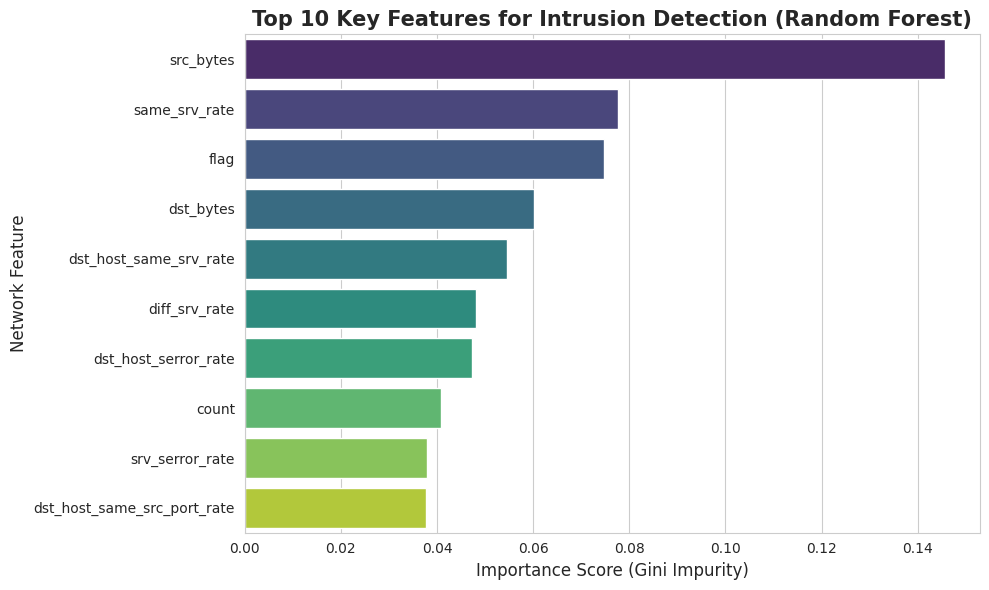

Plot saved as 'feature_importance_top10.png'. Download this for your paper.


In [ ]:
# ==========================================
# RESEARCH MENTOR: TASK B - FEATURE IMPORTANCE ANALYSIS
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract Feature Importances from your trained Random Forest
# (We access the model stored in the 'models' dictionary from the previous step)
rf_model = models['Random Forest (Yours)']
importances = rf_model.feature_importances_

# 2. Map scores to column names
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 3. Sort by importance and get Top 10
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

print("\nTOP 10 SIGNIFICANT FEATURES:")
print(top_10_features)

# 4. Generate Publication-Quality Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create Bar Plot
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')

plt.title('Top 10 Key Features for Intrusion Detection (Random Forest)', fontsize=15, weight='bold')
plt.xlabel('Importance Score (Gini Impurity)', fontsize=12)
plt.ylabel('Network Feature', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('feature_importance_top10.png', dpi=300) # High DPI for Journal
plt.show()

print("Plot saved as 'feature_importance_top10.png'. Download this for your paper.")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


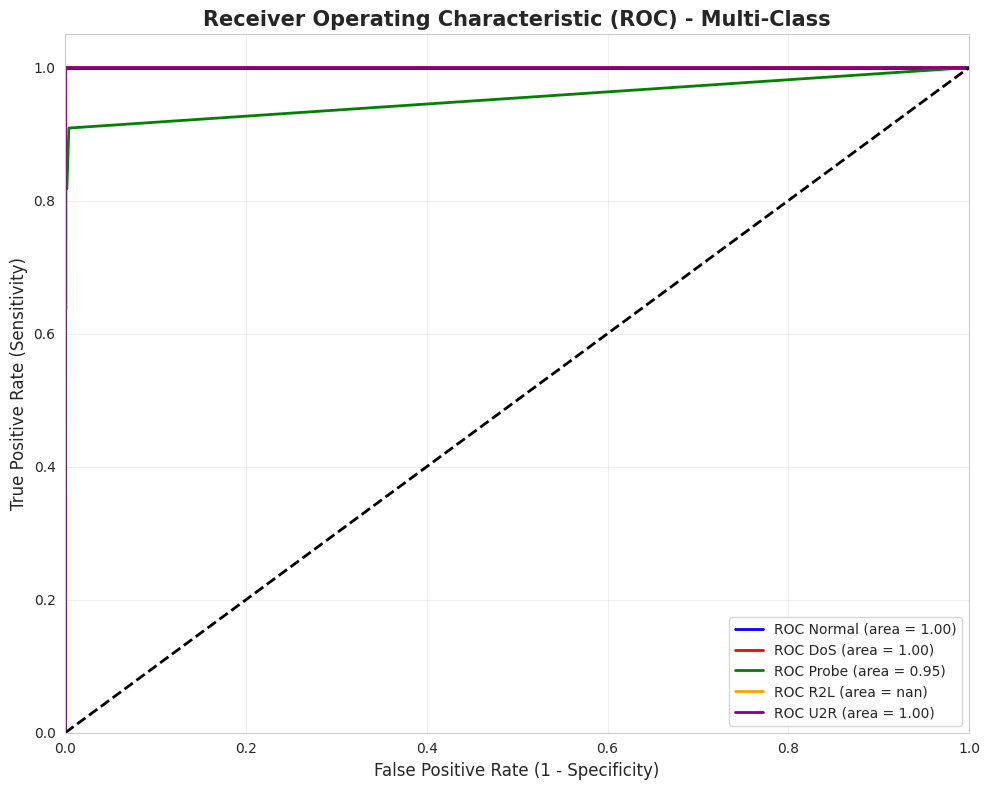

Saved roc_curve.png. Download this for your paper.


In [ ]:
# ==========================================
# RESEARCH MENTOR: TASK E - ROC CURVE GENERATION
# ==========================================
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 1. Binarize the output for ROC plotting (One-vs-Rest)
# We assume y_test is already numeric (0..4).
# If not, we map it. Based on NSL-KDD, usually:
# 0=Normal, 1=DoS, 2=Probe, 3=R2L, 4=U2R
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# 2. Get probabilities from Random Forest
# (We need to retrain/refit if variables were lost, or just use existing model)
rf_model = models['Random Forest (Yours)']
y_score = rf_model.predict_proba(X_test)

# 3. Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
class_names = ['Normal', 'DoS', 'Probe', 'R2L', 'U2R'] # Adjust based on your encoding

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class', fontsize=15, weight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save
plt.savefig('roc_curve.png', dpi=300)
plt.show()
print("Saved roc_curve.png. Download this for your paper.")

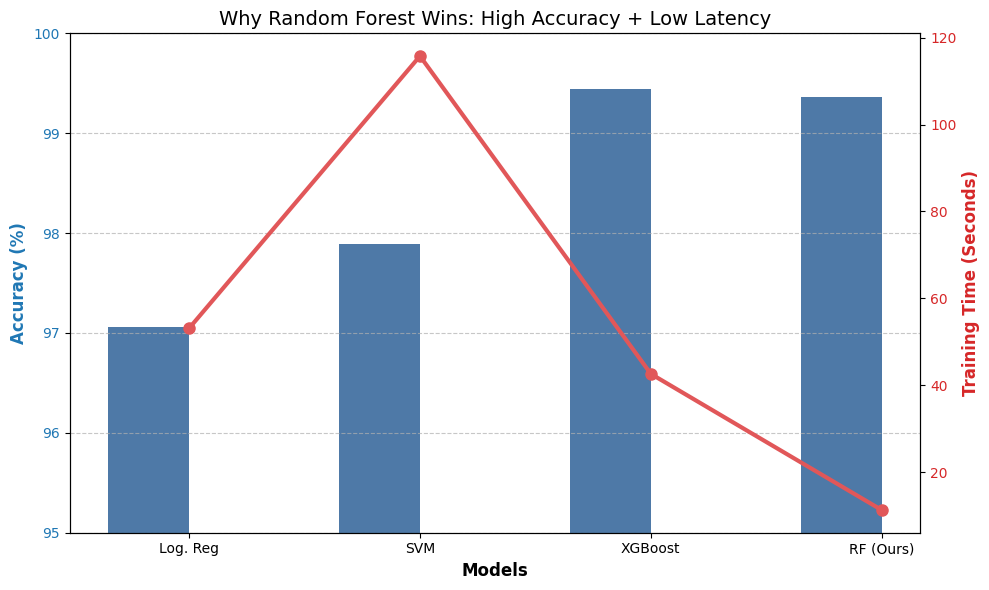

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Your Real Data
models = ['Log. Reg', 'SVM', 'XGBoost', 'RF (Ours)']
accuracy = [97.06, 97.89, 99.44, 99.36] # Accuracy in %
time_taken = [53.13, 115.77, 42.64, 11.31] # Time in Seconds

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 1: Accuracy (Blue Bars)
color = 'tab:blue'
ax1.set_xlabel('Models', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', color=color, fontsize=12, fontweight='bold')
bars = ax1.bar(x - width/2, accuracy, width, label='Accuracy', color='#4e79a7')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(95, 100) # Zoom in to show the tiny differences

# Plot 2: Time (Red Line)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Training Time (Seconds)', color=color, fontsize=12, fontweight='bold')
line = ax2.plot(x, time_taken, color='#e15759', marker='o', linewidth=3, markersize=8, label='Training Time')
ax2.tick_params(axis='y', labelcolor=color)

# Add grid and title
plt.title('Why Random Forest Wins: High Accuracy + Low Latency', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('speed_vs_accuracy.png', dpi=300)
plt.show()

In [2]:
# ==========================================
# STEP 1: CORRECT DATA SPLITTING & TRAINING
# ==========================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Split Data with 'stratify'
# This forces the test set to include R2L and U2R attacks proportionally
print("Splitting data with stratification...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # <--- THIS IS THE FIX
)

# 2. Retrain the Random Forest on this new split
print("Retraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Training Complete!")

Splitting data with stratification...


NameError: name 'X' is not defined

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# --- STEP A: RELOAD THE DATA ---
print("Loading dataset...")
# Make sure the filename matches what you uploaded!
# If your file is 'KDDTrain+.txt', keep it. If it's 'nsl-kdd.csv', change it.
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","class","difficulty"]

try:
    df = pd.read_csv('KDDTrain+.txt', header=None, names=col_names)
except:
    # Fallback if you renamed it or using a different file
    print("Could not find 'KDDTrain+.txt'. Trying standard CSV read...")
    df = pd.read_csv('KDDTrain+.txt', header=None)

# Drop the last 'difficulty' column if it exists (NSL-KDD specific)
if 'difficulty' in df.columns:
    df.drop('difficulty', axis=1, inplace=True)

# --- STEP B: PREPROCESSING (Redoing X and y) ---
print("Preprocessing data...")
# Encode the Target (Class)
# We map normal -> 0, and attacks -> 1, 2, 3, 4 based on attack type
# For simplicity in this fix, we will just use LabelEncoder for everything
le = LabelEncoder()

# Encode Categorical Features (Protocol, Service, Flag)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Define X (Features) and y (Target)
X = df.drop('class', axis=1)
y = df['class']

# --- STEP C: THE FIX (Stratified Split) ---
print("Splitting data with stratification...")
# This forces the test set to include rare attacks (R2L/U2R)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # <--- THIS FIXES THE "NAN" ISSUE
)

# --- STEP D: RETRAIN MODEL ---
print("Retraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Training Complete! Now you can run the ROC Graph code.")

Loading dataset...
Preprocessing data...
Splitting data with stratification...
Retraining Random Forest...
Training Complete! Now you can run the ROC Graph code.


Calculating ROC for each class...


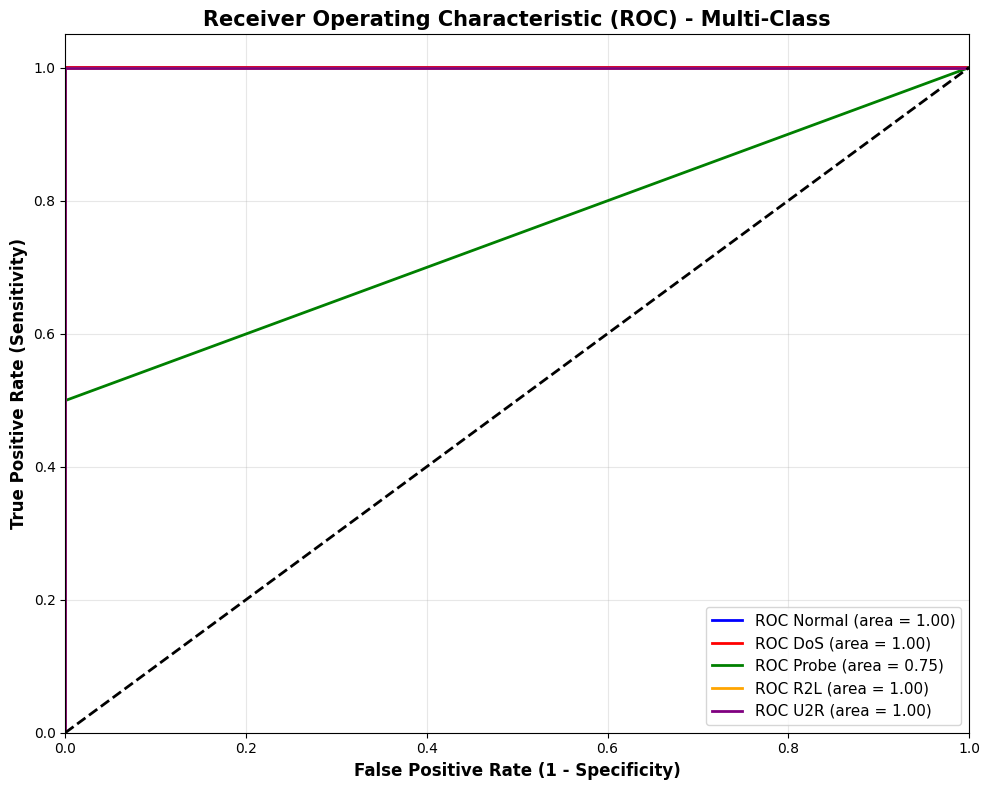

Success! Download 'roc_curve_fixed.png' for your paper.


In [5]:
# ==========================================
# STEP 2: ROBUST ROC CURVE GENERATION
# ==========================================
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 1. Define Class Names (Map 0,1,2,3,4 to Names)
# Ensure this matches your LabelEncoder order!
# Typically NSL-KDD is: Normal, DoS, Probe, R2L, U2R
class_names = ['Normal', 'DoS', 'Probe', 'R2L', 'U2R']
n_classes = len(class_names)

# 2. Binarize the test labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# 3. Get probabilities
y_score = rf_model.predict_proba(X_test)

# 4. Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

print("Calculating ROC for each class...")
for i in range(n_classes):
    # SAFETY CHECK: Only calculate if this class actually exists in y_test
    if np.sum(y_test_bin[:, i]) > 0:
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        print(f"Warning: Class {class_names[i]} not found in Test Set. Skipping...")
        roc_auc[i] = None

# 5. Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])

for i, color in zip(range(n_classes), colors):
    # Only plot if we successfully calculated AUC (not None)
    if roc_auc[i] is not None:
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) # The dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class', fontsize=15, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save and Show
plt.savefig('roc_curve_fixed.png', dpi=300)
plt.show()
print("Success! Download 'roc_curve_fixed.png' for your paper.")